## Digit Recognizer

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import plotly.tools as tls
import plotly.graph_objs as go
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import plotly.offline as py
py.init_notebook_mode(connected=True)

%matplotlib inline

np.finfo(np.longdouble)

finfo(resolution=1.0000000000000000715e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)

## Loading the Digits Dataset

In [2]:
train = pd.read_csv("./input/train.csv")
test = pd.read_csv("./input/test.csv")

train_labels_df, train_images_df = train[['label']], train.iloc[:, 1:]
test_images_df = test.iloc[:, 0:]

## Check for null and missing values

In [3]:
train_images_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [4]:
test_images_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
from sklearn.model_selection import train_test_split
import _pickle as pickle

x_train, x_test, y_train, y_test = train_test_split(
    train_images_df, train_labels_df, test_size=0.25, random_state=40)

## Show digit data

In [6]:
x_train.shape, y_train.shape, type(x_train), type(y_train)

((31500, 784),
 (31500, 1),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



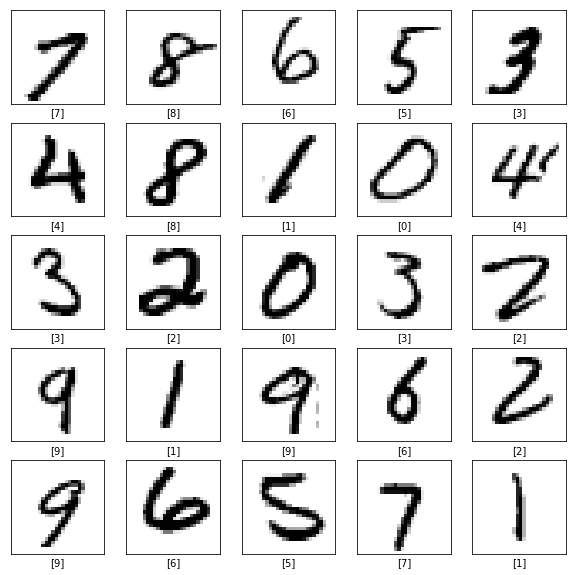

In [7]:
image_size = int(x_train.shape[1]**.5)

plt.figure(figsize=(10, 10))
plt.gray()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train.values[i].reshape(
        (image_size, image_size)), cmap=plt.cm.binary)
    plt.xlabel(y_train.values[i])

plt.show()

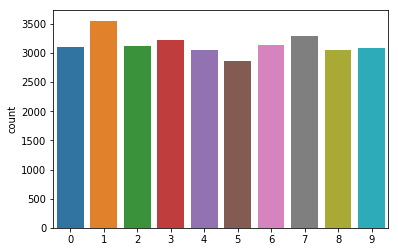

In [8]:
labels = y_train.values.reshape((y_train.values.shape[0]))
g = sns.countplot(labels)

## PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9, whiten=True)
pca.fit(x_train)
pcaTrain = pca.transform(x_train)
pcaTest = pca.transform(x_test)

#print('explained_variance_', pca.explained_variance_, '\nexplained_variance_ratio_', pca.explained_variance_ratio_, '\nn_components_', pca.n_components_)
print('sum of explained_variance_ratio_', sum(pca.explained_variance_ratio_))
pcaTrain.shape, pcaTest.shape

sum of explained_variance_ratio_ 0.9007457718763443


((31500, 87), (10500, 87))

#########show PCA data if 2 dimision
uniqueClasses = set(y_train)
for c in uniqueClasses:
    plt.scatter(x_train[y_train==c][0], x_train[y_train==c][1], s=5)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('MNIST visualization')
plt.show()

## K-Nearest-Neighbors

In [10]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [11]:
size = 5000
pcaTrain1, x_train1, y_train1 = pcaTrain[0:size,
                                         :], x_train.iloc[0:size, :], y_train.iloc[0:size, :]

In [12]:
knnClf = KNeighborsClassifier()
knnClf.fit(x_train, y_train)  # 训练SVM
knnClf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9638095238095238

In [13]:
from sklearn.metrics import classification_report

target_names = ['Digit-' + str(x) for x in range(0, 10)]
print("knnClf:\n", classification_report(
    knnClf.predict(x_test), y_test, target_names=target_names))

knnClf:
               precision    recall  f1-score   support

     Digit-0       0.99      0.97      0.98      1039
     Digit-1       1.00      0.95      0.97      1184
     Digit-2       0.96      0.98      0.97      1030
     Digit-3       0.96      0.96      0.96      1128
     Digit-4       0.96      0.97      0.96      1005
     Digit-5       0.95      0.95      0.95       935
     Digit-6       0.99      0.97      0.98      1026
     Digit-7       0.97      0.96      0.96      1109
     Digit-8       0.92      0.98      0.95       952
     Digit-9       0.94      0.94      0.94      1092

   micro avg       0.96      0.96      0.96     10500
   macro avg       0.96      0.96      0.96     10500
weighted avg       0.96      0.96      0.96     10500



## SVM classifier

In [14]:
from sklearn.svm import SVC, LinearSVC

原始数据 x_train and x_test, shape is (n_samples * (= 28 * 28))  
SVC全称是C-Support Vector Classification，是一种基于libsvm的支持向量机，由于其时间复杂度为O(n^2)，所以当样本数量超过两万时难以实现。 

In [15]:
size = 5000
pcaTrain1, x_train1, y_train1 = pcaTrain[0:size,
                                         :], x_train.iloc[0:size, :], y_train.iloc[0:size, :]

In [16]:
svmLinearClf = LinearSVC()
svmLinearClf.fit(x_train1, y_train1)  # 训练SVM
svmLinearClf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.8205714285714286

In [35]:
svmPcaClf = SVC(C=10, kernel='poly', decision_function_shape='ovr')
svmPcaClf.fit(x_train1, y_train1)  # 训练SVM
svmPcaClf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.9365714285714286

PCA data pcaTrain

In [17]:
svmPcaClf = SVC(C=10, kernel='rbf', decision_function_shape='ovr')
svmPcaClf.fit(pcaTrain1, y_train1)  # 训练SVM
svmPcaClf.score(pcaTest, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



0.9488571428571428

n为特征数，m为训练样本数。

(1)如果相较于m而言，n要大许多，即训练集数据量不够支持我们训练一个复杂的非线性模型，我们选用逻辑回归模型或者不带核函数的支持向量机。

(2)如果n较小，而且m大小中等，例如n在 1-1000 之间，而m在10-10000之间，使用高斯核函数的支持向量机。

(3)如果n较小，而m较大，例如n在1-1000之间，而m大于50000，则使用支持向量机会非常慢，解决方案是创造、增加更多的特征，然后使用逻辑回归或不带核函数的支持向量机。

**生成classification_report**

In [18]:
from sklearn.metrics import classification_report

target_names = ['Digit-' + str(x) for x in range(0, 10)]
print("svmLinearClf:\n", classification_report(
    svmLinearClf.predict(x_test), y_test, target_names=target_names))
print("svmPcaClf:\n", classification_report(
    svmPcaClf.predict(pcaTest), y_test, target_names=target_names))

svmLinearClf:
               precision    recall  f1-score   support

     Digit-0       0.94      0.87      0.91      1106
     Digit-1       0.97      0.91      0.94      1212
     Digit-2       0.81      0.80      0.80      1067
     Digit-3       0.78      0.79      0.78      1115
     Digit-4       0.86      0.82      0.84      1072
     Digit-5       0.75      0.70      0.72       996
     Digit-6       0.90      0.89      0.90      1022
     Digit-7       0.86      0.85      0.86      1122
     Digit-8       0.59      0.80      0.68       747
     Digit-9       0.72      0.76      0.74      1041

   micro avg       0.82      0.82      0.82     10500
   macro avg       0.82      0.82      0.82     10500
weighted avg       0.83      0.82      0.82     10500

svmPcaClf:
               precision    recall  f1-score   support

     Digit-0       0.98      0.97      0.97      1037
     Digit-1       0.99      0.99      0.99      1128
     Digit-2       0.96      0.92      0.94      11

## Decition Tree classifier

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dtClf = DecisionTreeClassifier(random_state=0)
cross_val_score(dtClf, x_train, y_train, cv=3)

array([0.84329779, 0.84      , 0.83431784])

In [32]:
dtClf.fit(pcaTrain, y_train)
dtClf.score(pcaTest, y_test)

0.8139047619047619

In [33]:
from sklearn.tree import export_graphviz

export_graphviz(dtClf, out_file='tree.dot')

## Random Forst classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rfClf = RandomForestClassifier()
rfClf.fit(x_train, y_train)  # 训练SVM
rfClf.score(x_test, y_test)

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/zhenglj/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.934952380952381

In [20]:
from sklearn.metrics import classification_report

target_names = ['Digit-' + str(x) for x in range(0, 10)]
print("rfClf:\n", classification_report(
    rfClf.predict(x_test), y_test, target_names=target_names))

rfClf:
               precision    recall  f1-score   support

     Digit-0       0.97      0.94      0.96      1058
     Digit-1       0.98      0.97      0.98      1143
     Digit-2       0.94      0.92      0.93      1081
     Digit-3       0.91      0.90      0.91      1131
     Digit-4       0.96      0.92      0.94      1050
     Digit-5       0.92      0.91      0.91       940
     Digit-6       0.96      0.96      0.96      1013
     Digit-7       0.94      0.96      0.95      1084
     Digit-8       0.89      0.93      0.91       968
     Digit-9       0.88      0.94      0.91      1032

   micro avg       0.93      0.93      0.93     10500
   macro avg       0.93      0.93      0.93     10500
weighted avg       0.94      0.93      0.94     10500



## Nerual Network classifier

In [21]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# fix error
# OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

print(tf.__version__)

1.12.0


In [22]:
x_train0 = x_train / 255.0
x_test0 = x_test / 255.0

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28*28,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(x_train0, y_train, epochs=5)

Epoch 1/5
31500/31500 [==============================] - 5s 169us/step - loss: 0.3294 - acc: 0.9085
Epoch 2/5
31500/31500 [==============================] - 5s 152us/step - loss: 0.1505 - acc: 0.9567
Epoch 3/5
31500/31500 [==============================] - 5s 157us/step - loss: 0.1019 - acc: 0.9693
Epoch 4/5
31500/31500 [==============================] - 5s 155us/step - loss: 0.0761 - acc: 0.9771
Epoch 5/5
31500/31500 [==============================] - 5s 157us/step - loss: 0.0587 - acc: 0.9825


In [26]:
from sklearn.metrics import classification_report

target_names = ['Digit-' + str(x) for x in range(0, 10)]
print(
    "rfClf:\n",
    classification_report(model.predict(x_test).argmax(1), y_test, target_names=target_names))

rfClf:
               precision    recall  f1-score   support

     Digit-0       0.99      0.98      0.98      1032
     Digit-1       1.00      0.96      0.98      1170
     Digit-2       0.98      0.97      0.97      1064
     Digit-3       0.96      0.94      0.95      1144
     Digit-4       0.99      0.95      0.97      1048
     Digit-5       0.96      0.96      0.96       930
     Digit-6       0.99      0.97      0.98      1020
     Digit-7       0.96      0.98      0.97      1076
     Digit-8       0.93      0.98      0.95       961
     Digit-9       0.93      0.96      0.94      1055

   micro avg       0.97      0.97      0.97     10500
   macro avg       0.97      0.97      0.97     10500
weighted avg       0.97      0.97      0.97     10500

